In [4]:
import pandas as pd 


In [5]:
path = 'C:\\Users\\dsadm\\Desktop\\AIBDADRIEL\\aula 09\\AulaIABD_09\\Social_Network_Ads.csv'
df = pd.read_csv(path)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
dic = { "User ID" : "Usuario ID", "Gender" : "Genero", "Age" : "Idade", "EstimatedSalary" : "Salario Estimado", "Purchased": "Comprou"}

In [8]:
df.rename(columns=dic, inplace= True)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn. svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [10]:
df.isnull()

,Usuario ID,Genero,Idade,Salario Estimado,Comprou
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [11]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values

In [12]:
#divisao do dataset
from sklearn.model_selection import train_test_split

In [13]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3, random_state=3)

In [14]:
sc = StandardScaler()
x_treino = sc.fit_transform(x_treino)
x_teste = sc.transform(x_teste)

In [15]:
algoritimo = SVC(kernel='linear', random_state=3)
algoritimo.fit(x_treino, y_treino)

SVC(kernel='linear', random_state=3)

In [20]:
y_prev = algoritimo.predict(x_teste)

In [21]:
#cm = confusion_matrix(y_teste, y_pred)
#print(cm)

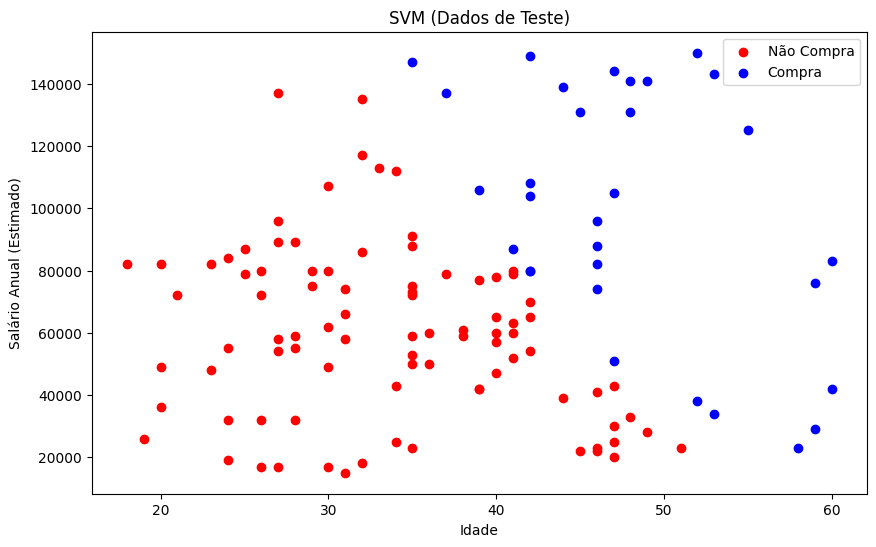

In [23]:
x_teste_inverse = sc.inverse_transform(x_teste)

plt.figure(figsize=(10,6))

plt.scatter(x_teste_inverse[y_prev == 0,0], x_teste_inverse[y_prev == 0,1], c='red', label = 'Não Compra')
plt.scatter(x_teste_inverse[y_prev == 1,0], x_teste_inverse[y_prev == 1,1], c='blue', label = 'Compra')

plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_116544\1445451452.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


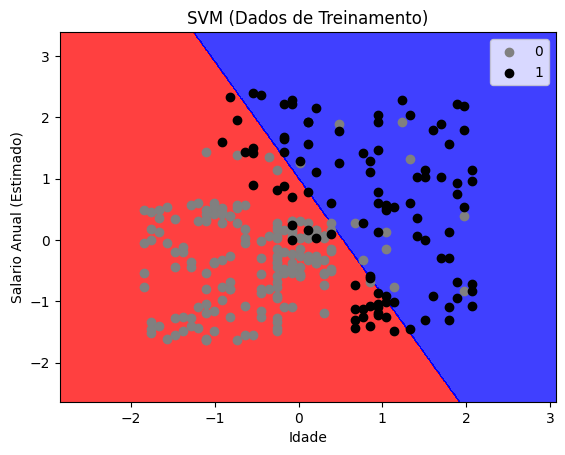

In [25]:
_X, _y = x_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() -1, stop = _X[:, 0].max() + 1, step= 0.01),
                     np.arange(start = _X[:, 1].min() -1, stop = _X[:, 1].max() + 1, step= 0.01))
plt.contourf(X1, X2, algoritimo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salario Anual (Estimado)')
plt.legend()
